 ---
# TUBES KELOMPOK 6 => Machine Learning
# "PREDIKSI HARGA BAWANG MERAH DI PASAR DAERAH NGANJUK BESERTA KLASIFIKASINYA BERDASAR KONDISI HARGA"
---
<br>
ANGGOTA KELOMPOK :

1.   Nama       : ARIQ LUTHFI R.
<br>Nim    : 2141723002
<br>Kelas  :TI-3G
<br>Absen  :05<br><br>
2.   Nama       : GALILEY SINGGANG M.Y.
<br>Nim    : 2141723001
<br>Kelas  :TI-3G
<br>Absen  :11<br><br>
3. Nama       : MUH. Irfan Ali
<br>Nim    : 2041720067
<br>Kelas  :TI-3G
<br>Absen  :15<br><br>




## PREDIKSI HARGA BAWANG ( REGRESI LINEAR )


### Persiapan Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Statistika/Data/prediksi-harga-bawang.csv')

data.head()

,id,pasar,tanggal,harga_terendah,harga_tertinggi,harga_jual,kondisi
0,1,Sukomoro,2022-06-16,33000,34000,39000,Turun
1,2,Pace,2022-06-17,32000,35000,41000,Turun
2,3,Gondang,2022-06-18,34000,35000,42000,Turun
3,4,Sukomoro,2022-06-19,35000,35000,38000,Turun
4,5,Gondang,2022-06-20,34000,38000,45000,Naik


In [23]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               39 non-null     int64 
 1   pasar            39 non-null     object
 2   tanggal          39 non-null     object
 3   harga_terendah   39 non-null     int64 
 4   harga_tertinggi  39 non-null     int64 
 5   harga_jual       39 non-null     int64 
 6   kondisi          39 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.3+ KB


,id,harga_terendah,harga_tertinggi,harga_jual
count,39.000000,39.000000,39.000000,39.000000
mean,20.000000,35628.205128,43410.256410,48384.615385
std,11.401754,3877.597514,6816.072139,5742.800457
min,1.000000,31000.000000,30000.000000,38000.000000
25%,10.500000,33000.000000,38000.000000,43000.000000
50%,20.000000,34000.000000,45000.000000,51000.000000
75%,29.500000,38000.000000,49500.000000,53000.000000
max,39.000000,46000.000000,53000.000000,58000.000000


### Visualisasi Data

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


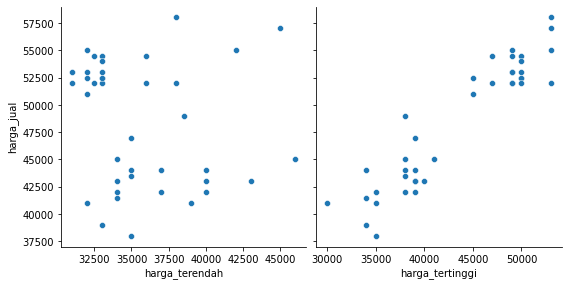

In [8]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

# operasi visualisasi
sns.pairplot(data, x_vars=['harga_terendah' , 'harga_tertinggi'], 
             y_vars='harga_jual', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

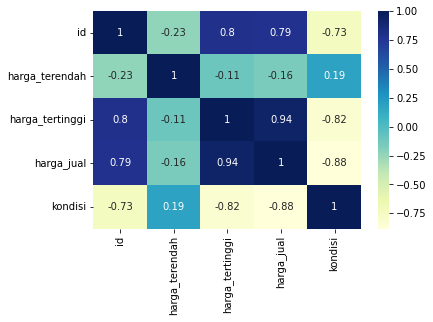

In [9]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa harga_tertinggi memiliki korelasi yang paling kuat terhadap harga_jual



### Regresi Linear

In [12]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['harga_tertinggi']
y = data['harga_jual']

# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# hasil training dtaset
X_train
y_train

5     43000
13    41000
1     41000
29    52500
12    49000
25    55000
9     43500
35    52000
11    44000
4     45000
34    53000
16    43000
17    43000
27    52000
14    42000
28    54500
32    52500
21    58000
2     42000
20    55000
30    52000
10    42000
15    44000
23    54500
3     38000
24    52500
8     47000
Name: harga_jual, dtype: int64

In [13]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const              14415.708812
harga_tertinggi        0.778736
dtype: float64

In [14]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             harga_jual   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     137.0
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.23e-11
Time:                        15:34:10   Log-Likelihood:                -246.31
No. Observations:                  27   AIC:                             496.6
Df Residuals:                      25   BIC:                             499.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.442e+04   2887.930      4.992      0.000    8467.906    2.04e+04
harga_tertinggi     0.7787      0.067     11.704      0.000       0.642       0.916
==============================================================================
Omnibus:                        0.987   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.985
Skew:                           0.359   Prob(JB):                        0.611
Kurtosis:                       2.399   Cond. No.                     2.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

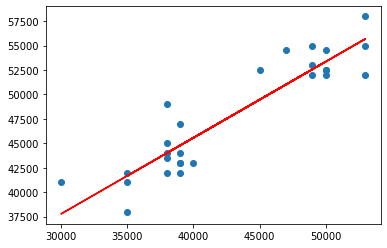

In [15]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 14415.708812 + 0.778736*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [16]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


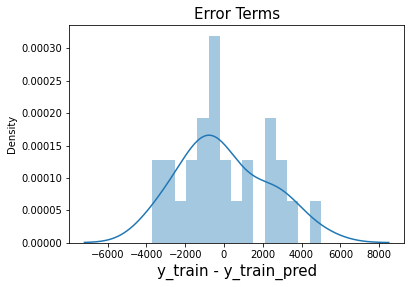

In [17]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

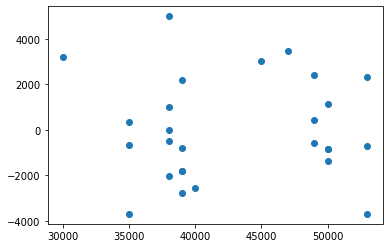

In [18]:
plt.scatter(X_train,res)
plt.show()

In [19]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


18    46343.869732
19    55688.697318
37    51016.283525
0     40892.720307
38    49458.812261
dtype: float64

In [20]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9308818552867556

perlu diperhatikan bahwa r^2 dari data training adalah 0.846 sedangkan dari data testing adalah 0,930. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

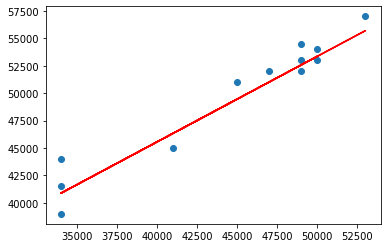

In [21]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## KLASIFIKASI HARGA SESUAI DENGAN KONDISI (CLASIFIER MENGGUNAKAN DECISION TREE DAN SVM)

### Persiapan Data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,classification_report,roc_auc_score, roc_curve

# Load data
df = pd.read_csv('/content/drive/MyDrive/Statistika/Data/prediksi-harga-bawang.csv')

df.head()

,id,pasar,tanggal,harga_terendah,harga_tertinggi,harga_jual,kondisi
0,1,Sukomoro,2022-06-16,33000,34000,39000,Turun
1,2,Pace,2022-06-17,32000,35000,41000,Turun
2,3,Gondang,2022-06-18,34000,35000,42000,Turun
3,4,Sukomoro,2022-06-19,35000,35000,38000,Turun
4,5,Gondang,2022-06-20,34000,38000,45000,Naik


In [32]:
# pemahaman terhadap data
# ukuran data
df.shape

# info data
df.info()

# deskripsi data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               39 non-null     int64 
 1   pasar            39 non-null     object
 2   tanggal          39 non-null     object
 3   harga_terendah   39 non-null     int64 
 4   harga_tertinggi  39 non-null     int64 
 5   harga_jual       39 non-null     int64 
 6   kondisi          39 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.3+ KB


,id,harga_terendah,harga_tertinggi,harga_jual
count,39.000000,39.000000,39.000000,39.000000
mean,20.000000,35628.205128,43410.256410,48384.615385
std,11.401754,3877.597514,6816.072139,5742.800457
min,1.000000,31000.000000,30000.000000,38000.000000
25%,10.500000,33000.000000,38000.000000,43000.000000
50%,20.000000,34000.000000,45000.000000,51000.000000
75%,29.500000,38000.000000,49500.000000,53000.000000
max,39.000000,46000.000000,53000.000000,58000.000000


In [33]:
# Encoding
# Fungsi encoding yang akan digunakan adalah LabelEncoder
# Hal ini karena kita hanya mengganti nilai variabel dari nama berupa string menjadi angka. Sama halnya dengan label

from sklearn.preprocessing import LabelEncoder

# Inisiasi label encoder
encode = LabelEncoder()

# Terpakan label encoder
df['kondisi'] = encode.fit_transform(df['kondisi'])

df.head()

,id,pasar,tanggal,harga_terendah,harga_tertinggi,harga_jual,kondisi
0,1,Sukomoro,2022-06-16,33000,34000,39000,1
1,2,Pace,2022-06-17,32000,35000,41000,1
2,3,Gondang,2022-06-18,34000,35000,42000,1
3,4,Sukomoro,2022-06-19,35000,35000,38000,1
4,5,Gondang,2022-06-20,34000,38000,45000,0


In [34]:
# Cek kolom null
data.isnull().sum()

id                 0
pasar              0
tanggal            0
harga_terendah     0
harga_tertinggi    0
harga_jual         0
kondisi            0
dtype: int64

### Seleksi Fitur

In [35]:
# Seleksi fitur
X = df.iloc[:,3:5]
y = df.iloc[:, 6]

# Cek jumlah fitur dan instance
print(X.shape)

# Cek label
print(X)
print(y)

(39, 2)
    harga_terendah  harga_tertinggi
0            33000            34000
1            32000            35000
2            34000            35000
3            35000            35000
4            34000            38000
5            34000            40000
6            34000            34000
7            35000            34000
8            35000            39000
9            35000            38000
10           37000            38000
11           37000            38000
12           38500            38000
13           39000            30000
14           40000            39000
15           40000            39000
16           40000            39000
17           43000            39000
18           46000            41000
19           45000            53000
20           42000            53000
21           38000            53000
22           36000            49000
23           33000            50000
24           33000            50000
25           32000            49000
26           31000  

### Split data training dan testing

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Traning Decision Tree

In [37]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 1.00
Test set accuracy: 1.0


### Traning SVM

In [41]:
from sklearn import svm

# menggunakan SVM library untuk membuat SVM classifier
# probability di set true agar bisa menghitung ROC
svm_model = svm.SVC(kernel = 'linear', C=100, probability=True)
 
# memasukkan training data kedalam svm
svm_model.fit(X_train, y_train)

# Memprediksi label set test
y_pred_svm = svm_model.predict(X_test)

#  menghitung set accuracy
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Test set accuracy: {:.2f}".format(acc_svm))
print(f"Test set accuracy: {acc_svm}")

Test set accuracy: 1.00
Test set accuracy: 1.0


## KESIMPULAN

### KESIMPULAN PREDIKSI ( REGRESI )

Dari penelitian yang telah dilakukan pada dataset *`prediksi-harga-bawang.csv`* untuk memprediksi **harga jual** bawang merah di pasar daerah ***Nganjuk*** telah ditemukan beberapa kesimpulan yang bisa diambil. Diantara lain : <br><br>



1.   Variabel yang **berkorelasi paling kuat** dengan ***harga jual*** adalah variabel ***harga tertinggi***  dengan tingkat korelasi sebesar `0.94`.
2.   Dari parameter yang dihasilkan pada `regresi linear`, ketika divisualisasikan dengan **scatter plot**. `Parameter tersebut dapat memotong lurus miring ke kanan` yang menandakan **`regresi bernilai positif`** dan layak digunakan pada dataset.
3. Pada residual analysis didapatkan `hasil r^2` dari ***data training*** adalah `0.846` sedangkan dari ***data testing*** adalah `0,930`. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)



### KESIMPULAN KLASIFIKASI ( DT DAN SVM )


Dari penelitian yang telah dilakukan pada dataset *`prediksi-harga-bawang.csv`* untuk mengklasifikasi `harga` berdasarkan `kondisi harga` yang ada menggunakan `klasifikasi Decision Tree dan SVM` telah ditemukan beberapa kesimpulan yang bisa diambil. Diantara lain : <br><br>

1.   Nilai X diambil dari data **harga terendah, harga tertinggi dan harga jual** pada langkah `seleksi fitur`
2.   Nilai Y diambil dari ***kondisi harga*** yang ada pada langkah `seleksi fitur`
3. Ketika menggunakan klasifikasi ***Decision Tree*** `nilai akurasi` yang didapat adalah `1.0` yang mana bernilai `sempurna`
4. Ketika menggunakan klasifikasi ***SVM*** `nilai akurasi` yang didapat adalah `1.0` yang mana bernilai `sempurna`
5. ***Kedua metode klasifikasi*** di atas ***sangat cocok*** dengan dataset yang kami gunakan, dimana keduanya menghasilkan output `nilai akurasi skor yang sama yakni 1.0`

